In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df_social_networks = pd.read_csv("task_3_data.csv")
df_social_networks.head(5)

,date,media_souce,cost,installs,activations,expected_revenue
0,2023-11-01,Meta,3189.69,959,175,3401.70
1,2023-11-02,Meta,3062.85,1071,161,4303.61
2,2023-11-03,Meta,3116.61,994,189,3210.65
3,2023-11-04,Meta,3111.15,1022,175,3583.85
4,2023-11-05,Meta,3297.28,1157,161,3346.88


### Checking if any 0 values in the dataframe

In [149]:
df_social_networks.isin([0, "0"]).values.any()

np.False_

### Checking for datatypes, and NaN values. 
P.S. since dataframe is small, I won't change data types to 32-16 bit

In [150]:
df_social_networks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              60 non-null     object 
 1   media_souce       60 non-null     object 
 2   cost              60 non-null     float64
 3   installs          60 non-null     int64  
 4   activations       60 non-null     int64  
 5   expected_revenue  60 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.9+ KB


In [151]:
df_social_networks.head(5)

,date,media_souce,cost,installs,activations,expected_revenue
0,2023-11-01,Meta,3189.69,959,175,3401.70
1,2023-11-02,Meta,3062.85,1071,161,4303.61
2,2023-11-03,Meta,3116.61,994,189,3210.65
3,2023-11-04,Meta,3111.15,1022,175,3583.85
4,2023-11-05,Meta,3297.28,1157,161,3346.88


### Cutting objects (data/string) off and checking numbers correlations

In [152]:
df_social_networks.iloc[:, 2:].corr()

,cost,installs,activations,expected_revenue
cost,1.000000,0.932881,0.963749,0.947808
installs,0.932881,1.000000,0.898338,0.868565
activations,0.963749,0.898338,1.000000,0.945999
expected_revenue,0.947808,0.868565,0.945999,1.000000


### Calculating CPI (cost per install $), activation rate(%) and potential ROI (return on investment %)

In [153]:
df_social_networks["CPI"] = df_social_networks["cost"] / df_social_networks["installs"]
df_social_networks["activation_rate"] = (
    df_social_networks["activations"] / df_social_networks["installs"]
) * 100
df_social_networks["ROI"] = (
    (
        df_social_networks["expected_revenue"] - df_social_networks["cost"]
    ) / df_social_networks["cost"]
) * 100

### Grouping data by media source

In [154]:
grouped_metrics = df_social_networks.groupby("media_souce").agg({
    "CPI": "mean",
    "activation_rate": "mean",
    "ROI": "mean"
}).round(4)
grouped_metrics

,CPI,activation_rate,ROI
media_souce,,,
Meta,3.4928,20.8274,23.4318
Tiktok,3.4138,16.0257,16.0845


### Unload data to CSV

In [155]:
# grouped by media_source and ungrouped metrics
grouped_metrics.to_csv("grouped_metrics.csv")
df_social_networks.to_csv("ungrouped_metrics.csv")

### Pie chart for total cost between Meta and Tiktok

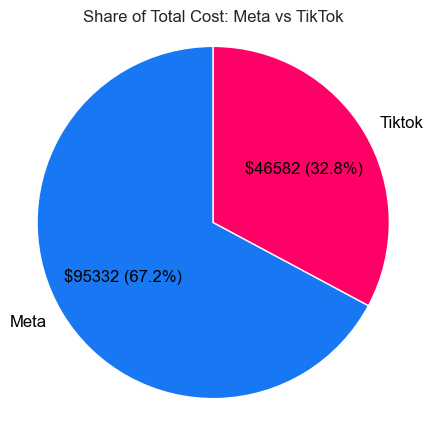

In [156]:
# Grouping the data by media source to get the total cost for each
cost_by_source = df_social_networks.groupby("media_souce")["cost"].sum()

# Function to format the labels with both dollar amount and percentage
def autopct_format(pct, values):
    total = sum(values)
    absolute = int(round(pct * total / 100))
    return f"${absolute} ({pct:.1f}%)"

# Create the pie chart
fig, ax = plt.subplots(figsize=(5, 5))

# Pie chart with formatted labels for both dollar amount and percentage
wedges, texts, autotexts = ax.pie(
    cost_by_source,
    labels=cost_by_source.index,
    autopct=lambda pct: autopct_format(pct, cost_by_source),
    colors=["#1877F2", "#ff0066"],  # Meta and TikTok colors
    startangle=90,
    textprops=dict(color="black", fontsize=12)
)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis("equal")

# Title
ax.set_title("Share of Total Cost: Meta vs TikTok")

# Show the plot
plt.show()

#### Conclusion: 
Analysis of our ad spending reveals that expenditures on Meta are significantly higher than on TikTok, with Meta accounting for roughly 67.2% of the total cost compared to TikTok's 32.8%. Given that both platforms have ad spendings in the tens of thousands of USD, the data can be considered stable and reliable for further processing. This allocation likely reflects our strategic focus or observed performance differences between the two platforms.

### Bar charts for CPI, activation rate and ROI. Meta vs. Tiktok

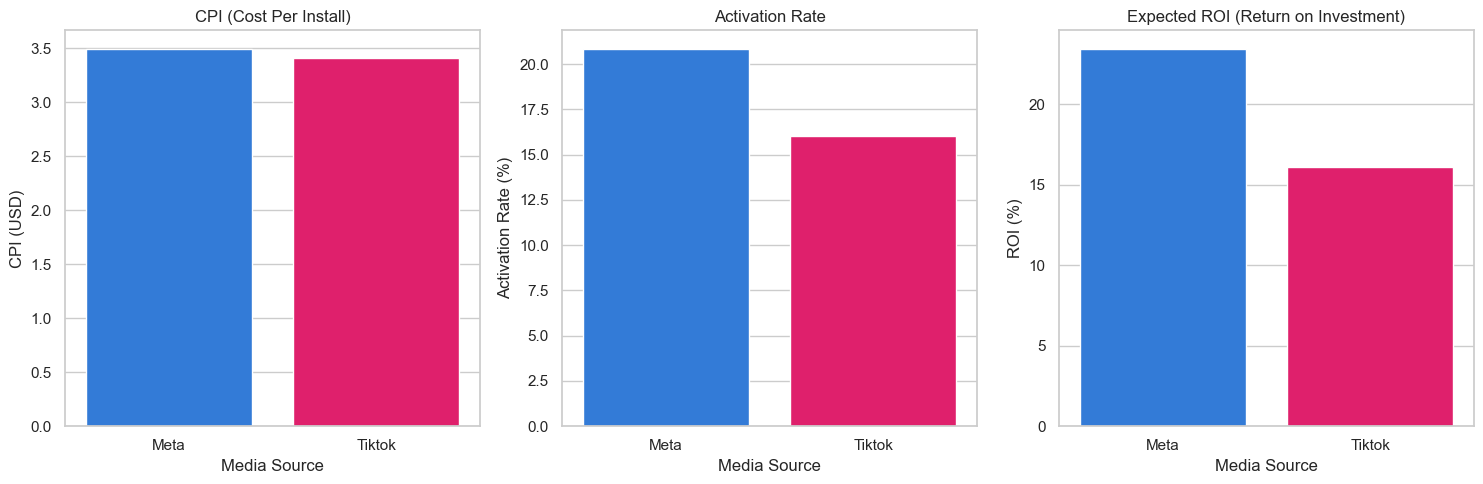

In [157]:
# Custom colors for Meta and TikTok.
custom_palette = {"Meta": "#1877F2", "Tiktok": "#ff0066"}

# Subplots for the bar charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# CPI chart
sns.barplot(
    x=grouped_metrics.index,
    y=grouped_metrics["CPI"],
    hue=grouped_metrics.index,
    palette=custom_palette,
    ax=axes[0],
    legend=False
)
axes[0].set_title("CPI (Cost Per Install)")
axes[0].set_ylabel("CPI (USD)")
axes[0].set_xlabel("Media Source")

# Activation rate chart
sns.barplot(
    x=grouped_metrics.index,
    y=grouped_metrics["activation_rate"],
    hue=grouped_metrics.index,
    palette=custom_palette,
    ax=axes[1],
    legend=False
)
axes[1].set_title("Activation Rate")
axes[1].set_ylabel("Activation Rate (%)")
axes[1].set_xlabel("Media Source")

# ROI chart
sns.barplot(
    x=grouped_metrics.index,
    y=grouped_metrics["ROI"],
    hue=grouped_metrics.index,
    palette=custom_palette,
    ax=axes[2],
    legend=False
)
axes[2].set_title("Expected ROI (Return on Investment)")
axes[2].set_ylabel("ROI (%)")
axes[2].set_xlabel("Media Source")

# Show the plot
plt.tight_layout()
plt.show()

#### Conclusion: 
The analysis shows that while Meta and TikTok have similar Cost Per Install (CPI), significant differences exist in their activation rate and Return on Investment (ROI). Meta outperforms TikTok with approximately a 20% higher activation rate and a 30% higher ROI. This disparity may be attributed to Meta's superior targeting capabilities based on factors such as age, gender, and location. Consequently, Meta proves to be more profitable for us, which likely justifies our higher ad spending on this platform.

### Line charts for cost, installs, activations and expected revenue. Meta vs. Tiktok

In [158]:
# Convert "date" column to datetime if not already
df_social_networks["date"] = pd.to_datetime(df_social_networks["date"])

# Set "date" as the index for easier plotting
df_social_networks.set_index("date", inplace=True)

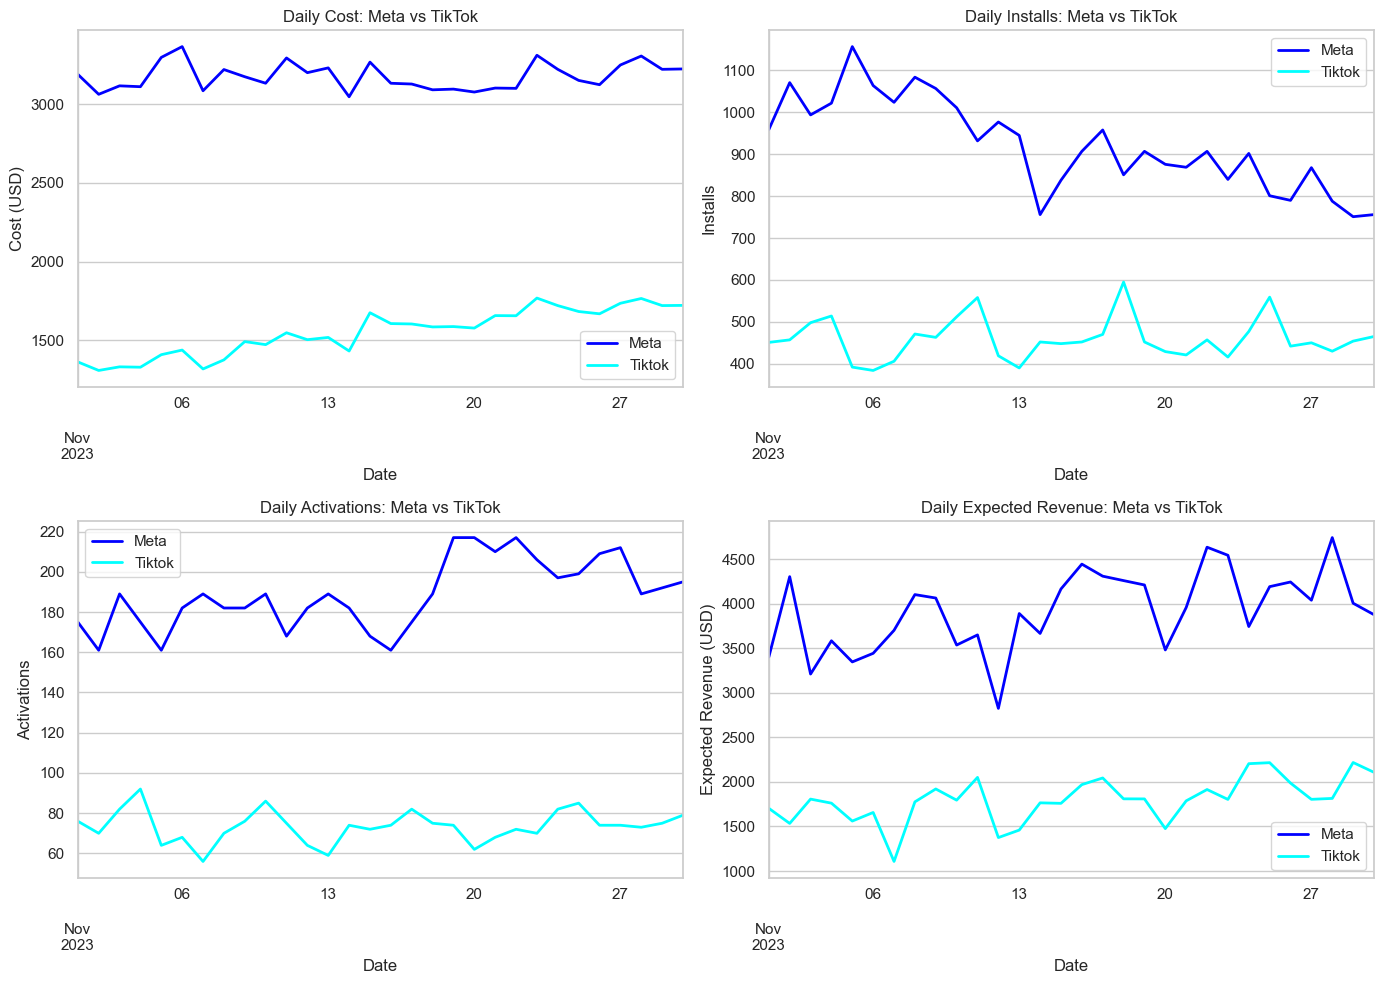

In [159]:
# Filter data by media source
meta_data = df_social_networks[df_social_networks["media_souce"] == "Meta"]
tiktok_data = df_social_networks[df_social_networks["media_souce"] == "Tiktok"]

# Create subplots for daily trends comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Daily cost comparison
meta_data.groupby("date")["cost"].sum().plot(ax=axes[0, 0], color="blue", label="Meta", linewidth=2)
tiktok_data.groupby("date")["cost"].sum().plot(ax=axes[0, 0], color="cyan", label="Tiktok", linewidth=2)
axes[0, 0].set_title("Daily Cost: Meta vs TikTok")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Cost (USD)")
axes[0, 0].legend()

# Daily installs comparison
meta_data.groupby("date")["installs"].sum().plot(ax=axes[0, 1], color="blue", label="Meta", linewidth=2)
tiktok_data.groupby("date")["installs"].sum().plot(ax=axes[0, 1], color="cyan", label="Tiktok", linewidth=2)
axes[0, 1].set_title("Daily Installs: Meta vs TikTok")
axes[0, 1].set_xlabel("Date")
axes[0, 1].set_ylabel("Installs")
axes[0, 1].legend()

# Daily activations comparison
meta_data.groupby("date")["activations"].sum().plot(ax=axes[1, 0], color="blue", label="Meta", linewidth=2)
tiktok_data.groupby("date")["activations"].sum().plot(ax=axes[1, 0], color="cyan", label="Tiktok", linewidth=2)
axes[1, 0].set_title("Daily Activations: Meta vs TikTok")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Activations")
axes[1, 0].legend()

# Daily expected revenue comparison
meta_data.groupby("date")["expected_revenue"].sum().plot(ax=axes[1, 1], color="blue", label="Meta", linewidth=2)
tiktok_data.groupby("date")["expected_revenue"].sum().plot(ax=axes[1, 1], color="cyan", label="Tiktok", linewidth=2)
axes[1, 1].set_title("Daily Expected Revenue: Meta vs TikTok")
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("Expected Revenue (USD)")
axes[1, 1].legend()

# Show the plot
plt.tight_layout()
plt.show()

#### Conclusion: 
There are no major anomalies observed, except for a noticeable decline in daily installations for Meta since approximately Nov. 7, 2023. My investigation into potential external factors, such as holidays or significant news events, did not reveal any clear causes for this decline. Despite the drop in installations, daily activations for Meta have remained steady, suggesting that the issue may not be related to our product. It is plausible that the "arbitrage creative" strategy for Meta has changed, potentially involving adjustments in ad visuals, targeting systems, or other unknown factors. The stability and slight increase in daily activations further supports the theory that the decline in installations is not due to changes in our product.